In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first five rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [19]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
# Get a summary of the dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [33]:
# Set a seed for reproducibility
np.random.seed(2)

# Take a random sample of 25 observations
sample = df.sample(n=25)

In [34]:
# Print the sample mean and highest Glucose value
print("Sample Mean Glucose: ", sample["Glucose"].mean())
print("Sample Highest Glucose: ", sample["Glucose"].max())

Sample Mean Glucose:  124.8
Sample Highest Glucose:  193


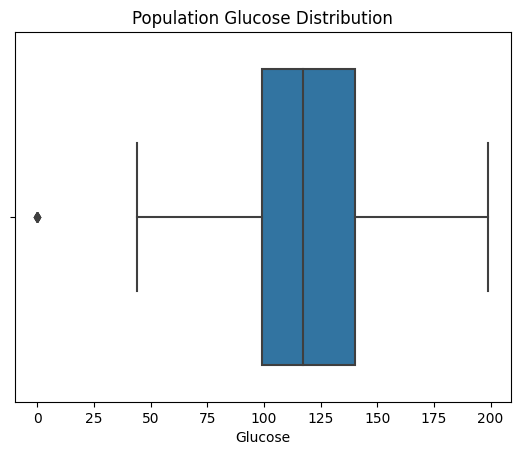

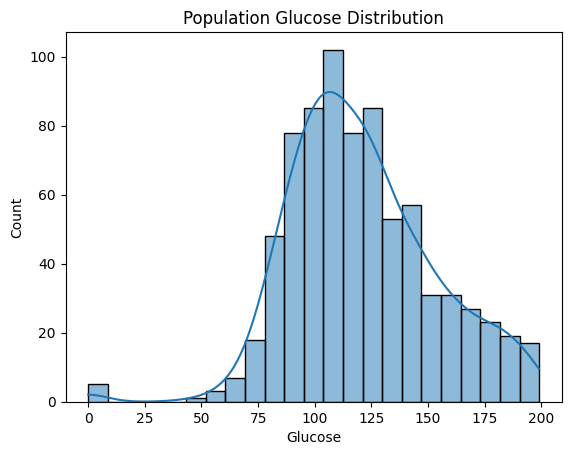

In [35]:
# Create a boxplot for the Glucose variable
sns.boxplot(x="Glucose", data=df)

# Set the title of the plot
plt.title("Population Glucose Distribution")
plt.show()

# Create a histogram for the Glucose variable
sns.histplot(x="Glucose", data=df, kde=True)

# Set the title of the plot
plt.title("Population Glucose Distribution")
plt.show()

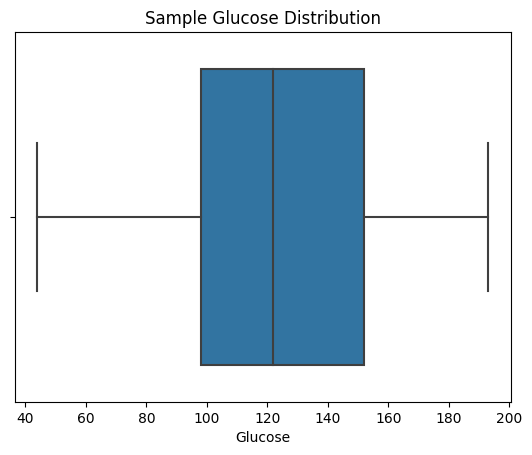

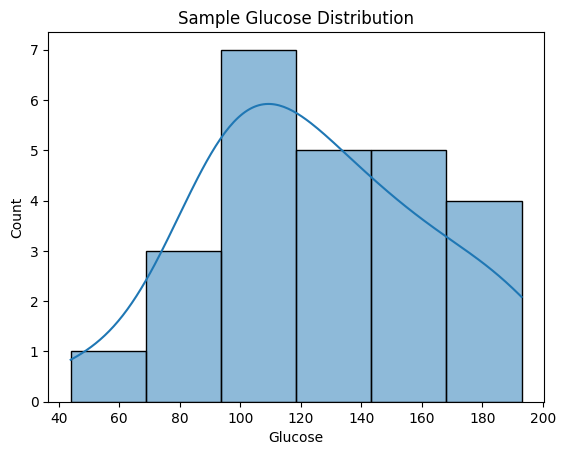

In [36]:
# Create a boxplot for the Glucose variable
sns.boxplot(x="Glucose", data=sample)

# Set the title of the plot
plt.title("Sample Glucose Distribution")
plt.show()

# Create a histogram for the Glucose variable
sns.histplot(x="Glucose", data=sample, kde=True)

# Set the title of the plot
plt.title("Sample Glucose Distribution")
plt.show()

In [37]:
# calculate population statistics for BloodPressure
pop_bp_mean = sample["BloodPressure"].mean()
pop_bp_std = sample["BloodPressure"].std()
pop_bp_percentile_98 = np.percentile(sample["BloodPressure"], 98)


In [38]:
# create empty lists to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles_98 = []


In [39]:
# create 500 bootstrap samples
for i in range(500):
    bootstrap_sample = sample["BloodPressure"].sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles_98.append(np.percentile(bootstrap_sample, 98))
    

In [40]:
# calculate average bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile_98 = np.mean(bootstrap_percentiles_98)


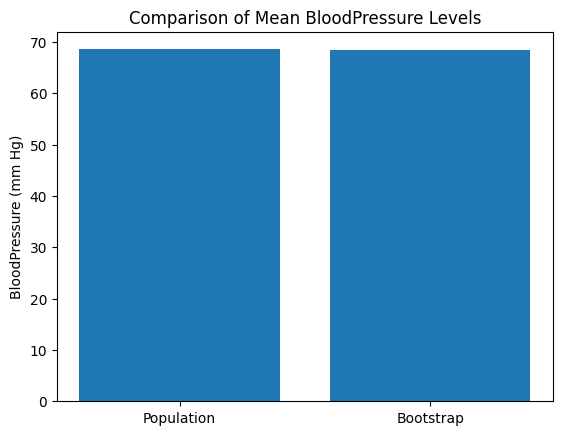

In [41]:
# create bar plot to compare mean BloodPressure
plt.bar(["Population", "Bootstrap"], [pop_bp_mean, avg_bootstrap_mean])
plt.title("Comparison of Mean BloodPressure Levels")
plt.ylabel("BloodPressure (mm Hg)")
plt.show()


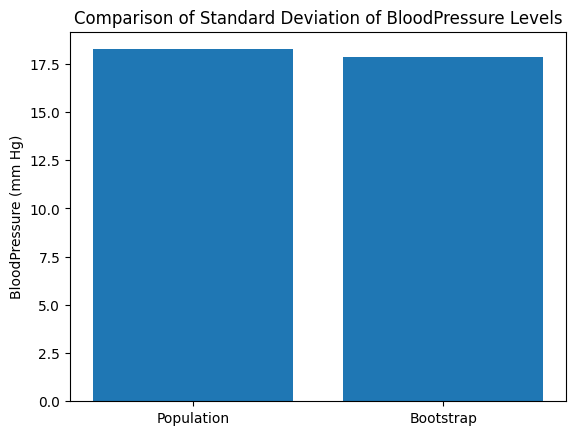

In [42]:
# create bar plot to compare standard deviation of BloodPressure
plt.bar(["Population", "Bootstrap"], [pop_bp_std, avg_bootstrap_std])
plt.title("Comparison of Standard Deviation of BloodPressure Levels")
plt.ylabel("BloodPressure (mm Hg)")
plt.show()


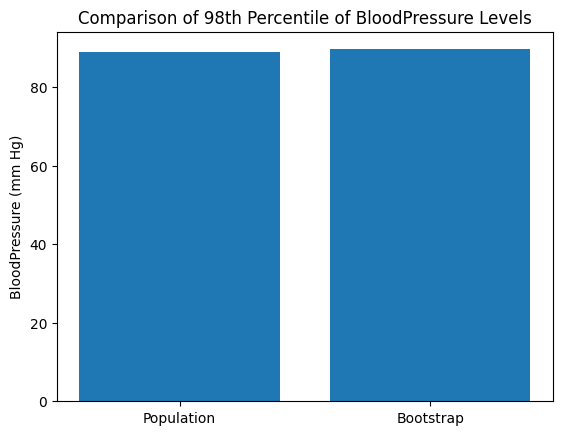

In [43]:
# create bar plot to compare 98th percentile of BloodPressure
plt.bar(["Population", "Bootstrap"], [pop_bp_percentile_98, avg_bootstrap_percentile_98])
plt.title("Comparison of 98th Percentile of BloodPressure Levels")
plt.ylabel("BloodPressure (mm Hg)")
plt.show()


Based on the analysis, it seems that the 150-observation bootstrap samples can fairly accurately represent the population statistics of BloodPressure. The typical bootstrap mean and standard deviation are reasonably close to those of the population. The population's 98th percentile and the average bootstrap 98th percentile are very similar. In general, the bootstrap samples accurately reflect the population statistics, illuminating the value of bootstrap sampling for estimating population statistics.